In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape


(891, 12)

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### Survivers w.r.t sex

In [8]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


More females survived than male

#### Survivers w.r.t class

In [9]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Upper class people have survived more

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

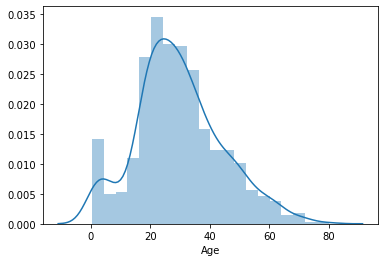

In [16]:
sns.distplot(df['Age'])

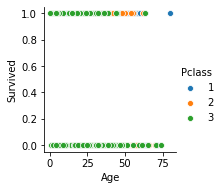

In [21]:
sns.pairplot(df,x_vars='Age',y_vars='Survived', hue = 'Pclass')

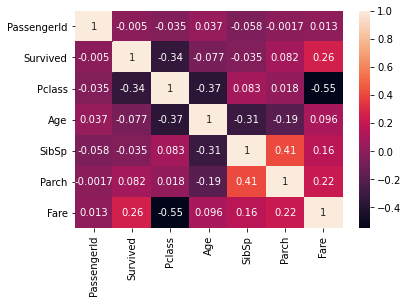

In [22]:
sns.heatmap(df.corr(),annot=True)

lets create a column family combining parch and sibsp colums

In [25]:
df['family']=df['Parch']+df['SibSp']

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Removing skewness in age and fare column

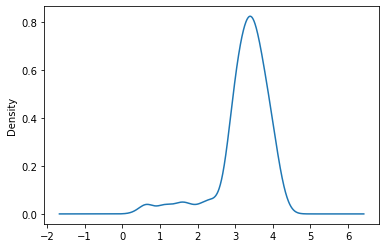

In [27]:
df['Age']=np.log(df['Age']+1)
df['Age'].plot(kind = 'density');

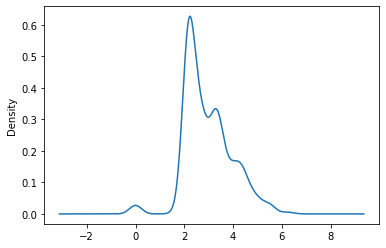

In [28]:
df['Fare']=np.log(df['Fare']+1)
df['Fare'].plot(kind = 'density');

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,3.135494,1,0,A/5 21171,2.110213,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,1,0,PC 17599,4.280593,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.295837,0,0,STON/O2. 3101282,2.188856,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,1,0,113803,3.990834,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.583519,0,0,373450,2.202765,NaN,S,0


Removing columns we dont need

In [30]:
df_new = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [31]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,3.135494,1,0,2.110213,S,1
1,1,1,female,3.663562,1,0,4.280593,C,1
2,1,3,female,3.295837,0,0,2.188856,S,0
3,1,1,female,3.583519,1,0,3.990834,S,1
4,0,3,male,3.583519,0,0,2.202765,S,0


In [32]:
df_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
family        0
dtype: int64

Null values in Age and Embarked

Since embarked is categorical value we will fill null values with mode of the values

And Age is numerical, we will fil null values with mean of values

In [33]:
df_new.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df_new['Embarked'].mode().values[0]

'S'

In [35]:
df_new['Embarked'].fillna('S', inplace = True)

In [37]:
df_new['Age'].fillna(df_new['Age'].mean(), inplace = True)

In [52]:
df_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
family      0
dtype: int64

### Train-Test Split

In [53]:
x = df_new.drop('Survived',  axis = 1)
y = df_new['Survived']

onehotencoder to categorical data

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [71]:
categorical_features = ['Sex', 'Embarked', 'Pclass']
onehotencode = OneHotEncoder()

transformer = ColumnTransformer([('Encoder', onehotencode, categorical_features)], remainder = 'passthrough')

encoded = transformer.fit_transform(x)

In [72]:
encoded_df = pd.DataFrame(encoded)

In [73]:
encoded_df.shape

(891, 13)

In [75]:
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.135494,1.0,0.0,2.110213,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.663562,1.0,0.0,4.280593,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.295837,0.0,0.0,2.188856,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.583519,1.0,0.0,3.990834,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.583519,0.0,0.0,2.202765,0.0


In [76]:
encoded_x = encoded_df.drop([0, 2, 5], axis = 1)

In [77]:
encoded_x.head()

,1,3,4,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,1.0,3.135494,1.0,0.0,2.110213,1.0
1,0.0,0.0,0.0,0.0,0.0,3.663562,1.0,0.0,4.280593,1.0
2,0.0,0.0,1.0,0.0,1.0,3.295837,0.0,0.0,2.188856,0.0
3,0.0,0.0,1.0,0.0,0.0,3.583519,1.0,0.0,3.990834,1.0
4,1.0,0.0,1.0,0.0,1.0,3.583519,0.0,0.0,2.202765,0.0


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_x,y,random_state = 31)

In [80]:
len(x_train), len(x_test), len(y_train), len(y_test)

(668, 223, 668, 223)

In [81]:
x_train.shape


(668, 10)

In [82]:
y_train.shape

(668,)

###  Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8116591928251121

#### Logistic Regression Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [85]:
log_grid = {'C': np.logspace(-4, 4),
            'solver': ['liblinear'],
            'max_iter': np.arange(100, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(max_iter = 1000, random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9500 out of 9500 | elapsed:   54.5s finished


0.7982062780269058

In [86]:
log_gscv.best_params_

{'C': 0.8286427728546842,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

### Linear SVC

In [87]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.8340807174887892

In [88]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.0s finished


0.7982062780269058

In [89]:
svc_gscv.best_params_

{'C': 6.1584821106602545, 'degree': 2, 'kernel': 'rbf'}

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

0.8026905829596412

In [94]:
rfcv_grid = {"n_estimators": np.arange(500, 2000, 100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rfcv_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfcv_grid,
                           cv=5,
                           n_iter = 100,
                           verbose=True)

rfcv_clf.fit(x_train, y_train)
ranf_tuned_score = rfcv_clf.score(x_test, y_test)
ranf_tuned_score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 20.3min finished


0.8026905829596412

In [99]:
rfcv_clf.best_params_

{'n_estimators': 1800,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.8385650224215246

In [98]:
gbc_grid = {'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1,0.01],
            'n_estimators': [100, 200, 500, 1000],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3, 5],
            'max_depth': [1, 2, 3]}
gbc_clf = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_clf.fit(x_train, y_train)
gbc_tuned_score = gbc_clf.score(x_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 57.5min finished


0.8251121076233184

In [100]:
gbc_clf.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [101]:
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'Random Forest', 'Score': ranf_score, 'Tuned_score': ranf_tuned_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score}]

In [102]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.811659,0.798206
1,SVC,0.834081,0.798206
2,Random Forest,0.802691,0.802691
3,Gradient Boosting,0.838565,0.825112


In [107]:
y_test=df_new['Survived']

In [108]:
y_test.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [110]:
y_pred=gbc_clf.predict(encoded_x)

In [111]:
pd.crosstab(y_test, y_pred, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,526,23
1,57,285


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       549
           1       0.93      0.83      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.90       891
weighted avg       0.91      0.91      0.91       891

